### Q1

This is for CAD-IT company recruiters, hope you enjoy))

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df=pd.read_csv("C:/Users/PC/Desktop/Results/Q1/Q1.csv")
df

,Timestamp,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,3/10/2018 0:00,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0
1,3/10/2018 0:00,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0
2,3/10/2018 0:00,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0
3,3/10/2018 0:00,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0
4,3/10/2018 0:00,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0
...,...,...,...,...,...,...,...,...,...,...
13842,10/17/2018 15:31,39.781958,39.366774,35.699109,34.977640,1.487568,1.888282,1.005966,1.792363,1
13843,10/17/2018 15:32,39.628272,39.461169,35.665838,35.052602,1.489291,1.752119,1.001954,1.742410,1
13844,10/17/2018 15:32,39.612208,39.890494,35.971746,34.636423,1.482300,1.850078,1.018153,1.804849,1
13845,10/17/2018 15:45,39.822699,39.725013,35.558900,34.845422,1.528402,1.937668,0.818741,1.351930,1


In [21]:
df.shape

(13847, 10)

In [22]:
df.columns

Index(['Timestamp', 'CHP1Temp1(Deg C)', 'CHP1Temp2(Deg C)', 'CHP2Temp1(Deg C)',
       'CHP2Temp2(Deg C)', 'CHP1Vib1(mm/s)', 'CHP1Vib2(mm/s)',
       'CHP2Vib1(mm/s)', 'CHP2Vib2(mm/s)', 'Fault'],
      dtype='object')

In [23]:
df.isnull().sum()

Timestamp           0
CHP1Temp1(Deg C)    0
CHP1Temp2(Deg C)    0
CHP2Temp1(Deg C)    0
CHP2Temp2(Deg C)    0
CHP1Vib1(mm/s)      0
CHP1Vib2(mm/s)      0
CHP2Vib1(mm/s)      0
CHP2Vib2(mm/s)      0
Fault               0
dtype: int64

In [24]:
df.dtypes

Timestamp            object
CHP1Temp1(Deg C)    float64
CHP1Temp2(Deg C)    float64
CHP2Temp1(Deg C)    float64
CHP2Temp2(Deg C)    float64
CHP1Vib1(mm/s)      float64
CHP1Vib2(mm/s)      float64
CHP2Vib1(mm/s)      float64
CHP2Vib2(mm/s)      float64
Fault                 int64
dtype: object

In [25]:
len(df['Timestamp'].unique())

2374

In [26]:
date_str = "3/10/2018 0:00"
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0       2018-03-10 00:00:00
1       2018-03-10 00:00:00
2       2018-03-10 00:00:00
3       2018-03-10 00:00:00
4       2018-03-10 00:00:00
                ...        
13842   2018-10-17 15:31:00
13843   2018-10-17 15:32:00
13844   2018-10-17 15:32:00
13845   2018-10-17 15:45:00
13846   2018-10-17 15:45:00
Name: Timestamp, Length: 13847, dtype: datetime64[ns]

In [27]:
df['Timestamp'][0]

Timestamp('2018-03-10 00:00:00')

In [28]:
# Extract month, day, hour, and minute into separate columns
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute

# Drop the 'timestamp' column if you don't need it anymore
df.drop(columns=['Timestamp'], inplace=True)

In [29]:
df

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault,month,day,hour,minute
0,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0,3,10,0,0
1,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0,3,10,0,0
2,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0,3,10,0,0
3,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0,3,10,0,0
4,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0,3,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13842,39.781958,39.366774,35.699109,34.977640,1.487568,1.888282,1.005966,1.792363,1,10,17,15,31
13843,39.628272,39.461169,35.665838,35.052602,1.489291,1.752119,1.001954,1.742410,1,10,17,15,32
13844,39.612208,39.890494,35.971746,34.636423,1.482300,1.850078,1.018153,1.804849,1,10,17,15,32
13845,39.822699,39.725013,35.558900,34.845422,1.528402,1.937668,0.818741,1.351930,1,10,17,15,45


In [30]:
df.corrwith(df['Fault']).abs().sort_values(ascending=False)

Fault               1.000000
month               1.000000
day                 1.000000
CHP2Temp2(Deg C)    0.857855
CHP2Temp1(Deg C)    0.829579
CHP2Vib2(mm/s)      0.515656
CHP2Vib1(mm/s)      0.481037
hour                0.321461
CHP1Temp1(Deg C)    0.298902
CHP1Temp2(Deg C)    0.250046
CHP1Vib2(mm/s)      0.136627
CHP1Vib1(mm/s)      0.062772
minute              0.013300
dtype: float64

In [31]:
df1=df[df['Fault']==0]
df1['month'].unique()

array([3], dtype=int64)

In [32]:
df2=df[df['Fault']==1]
df2['month'].unique()

array([10], dtype=int64)

[]

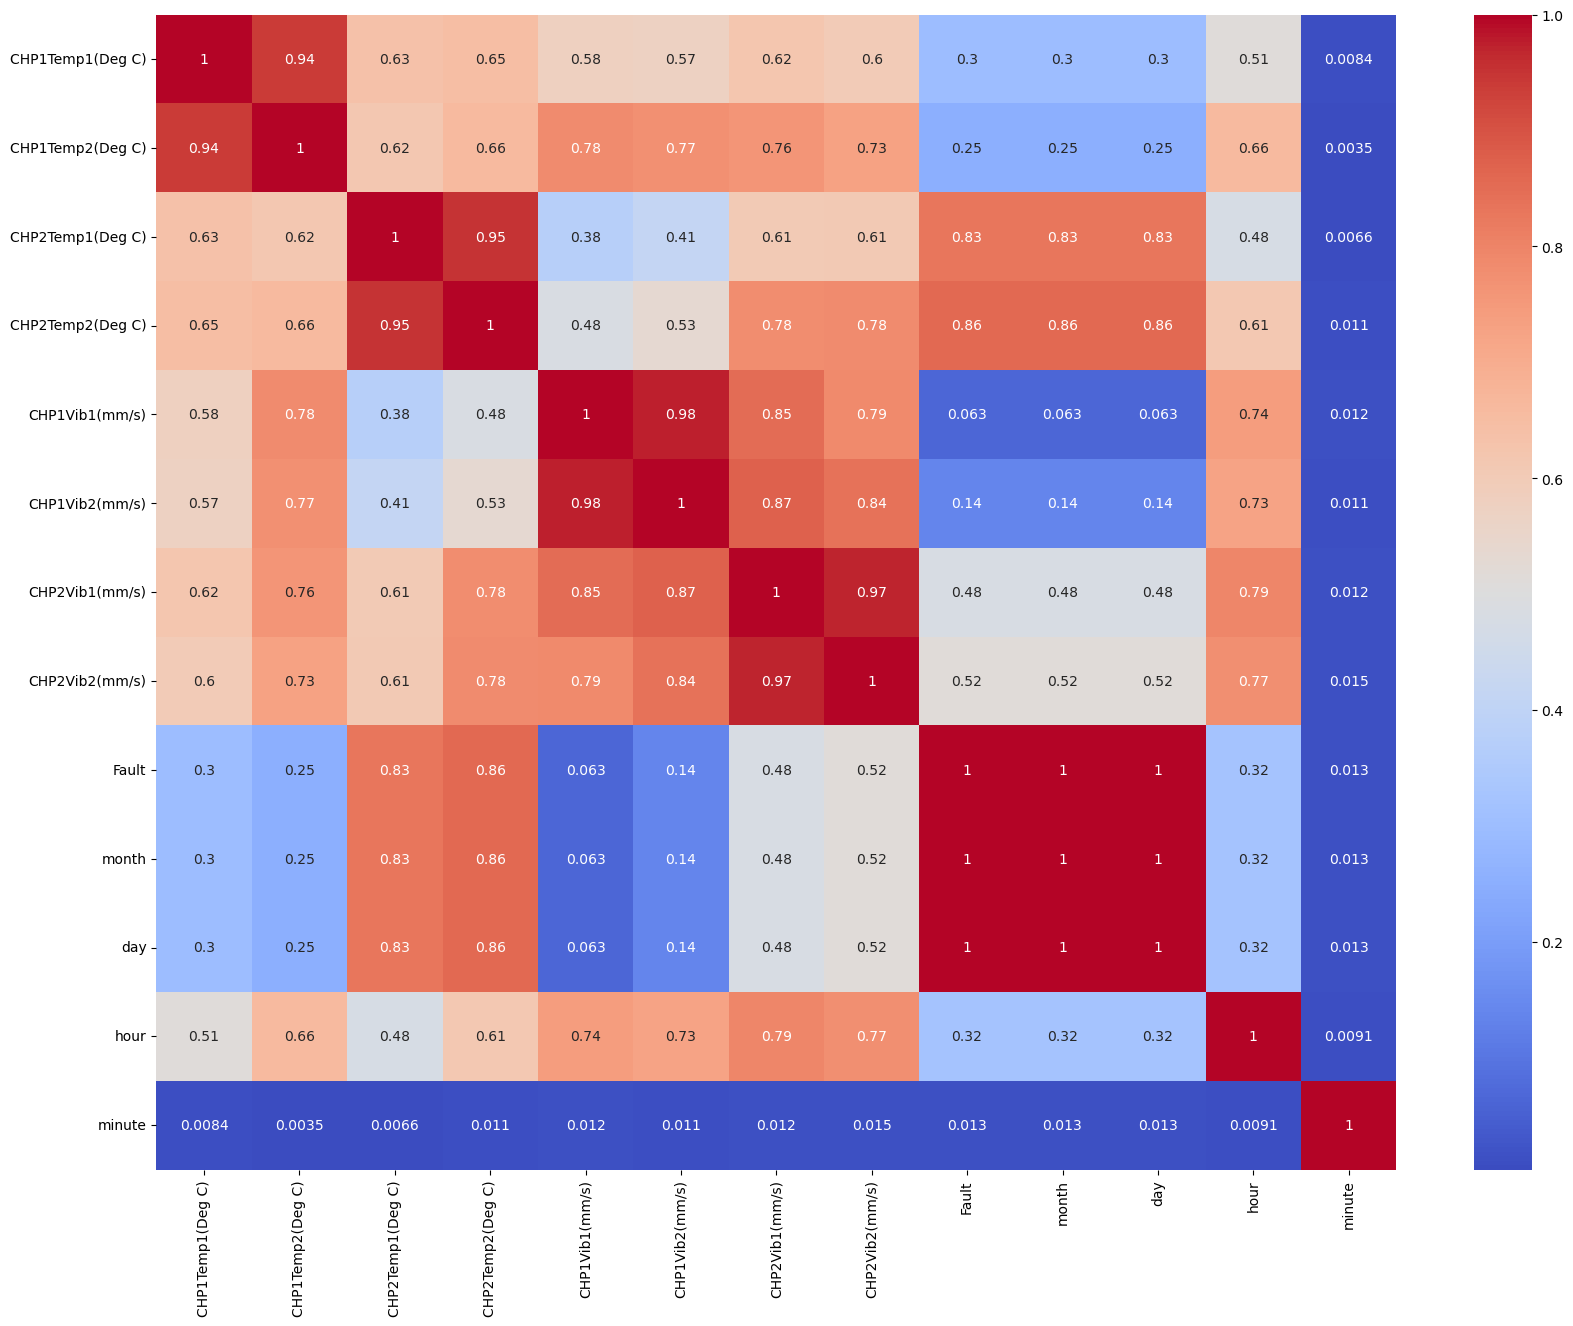

In [33]:
corrm=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corrm, cmap="coolwarm", annot=True)
plt.plot()

In [34]:
df.head()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault,month,day,hour,minute
0,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0,3,10,0,0
1,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0,3,10,0,0
2,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0,3,10,0,0
3,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0,3,10,0,0
4,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0,3,10,0,0


In [35]:
df=df.drop(["month","day","hour","minute"],axis=1)

In [36]:
df.head()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0
1,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0
2,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0
3,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0
4,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0


In [37]:
list(df.columns)

['CHP1Temp1(Deg C)',
 'CHP1Temp2(Deg C)',
 'CHP2Temp1(Deg C)',
 'CHP2Temp2(Deg C)',
 'CHP1Vib1(mm/s)',
 'CHP1Vib2(mm/s)',
 'CHP2Vib1(mm/s)',
 'CHP2Vib2(mm/s)',
 'Fault']

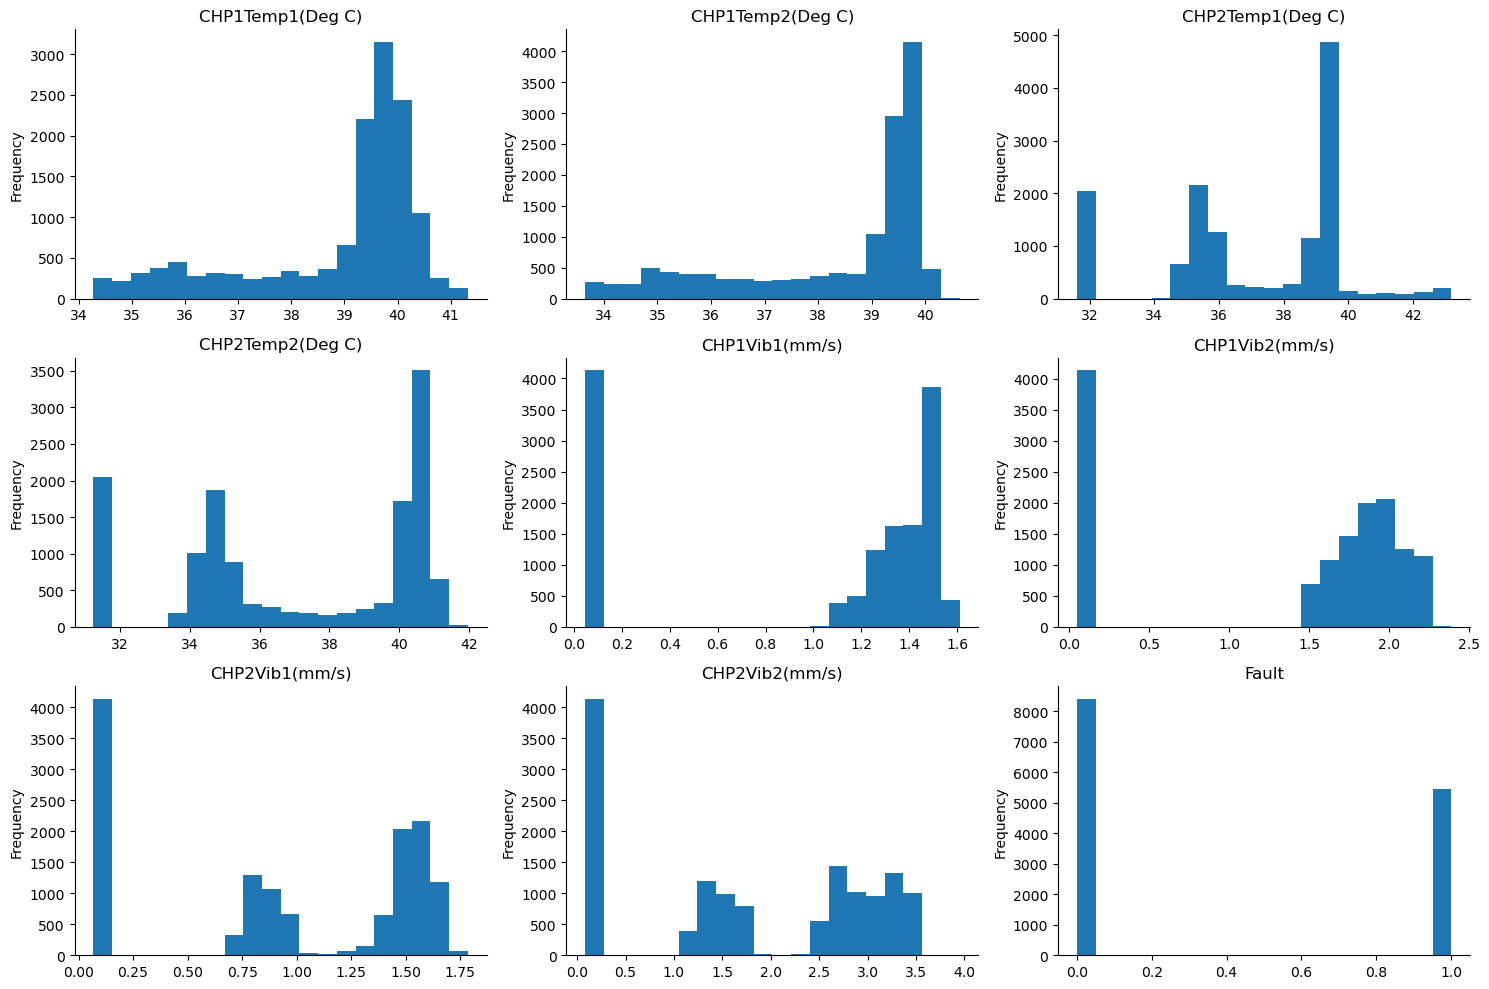

In [38]:
columns = [
    'CHP1Temp1(Deg C)',
    'CHP1Temp2(Deg C)',
    'CHP2Temp1(Deg C)',
    'CHP2Temp2(Deg C)',
    'CHP1Vib1(mm/s)',
    'CHP1Vib2(mm/s)',
    'CHP2Vib1(mm/s)',
    'CHP2Vib2(mm/s)',
    'Fault'
]

# Create a subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate over columns and plot histograms
for i, col in enumerate(columns):
    df[col].plot(kind='hist', bins=20, ax=axs[i])
    axs[i].set_title(col)
    axs[i].spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

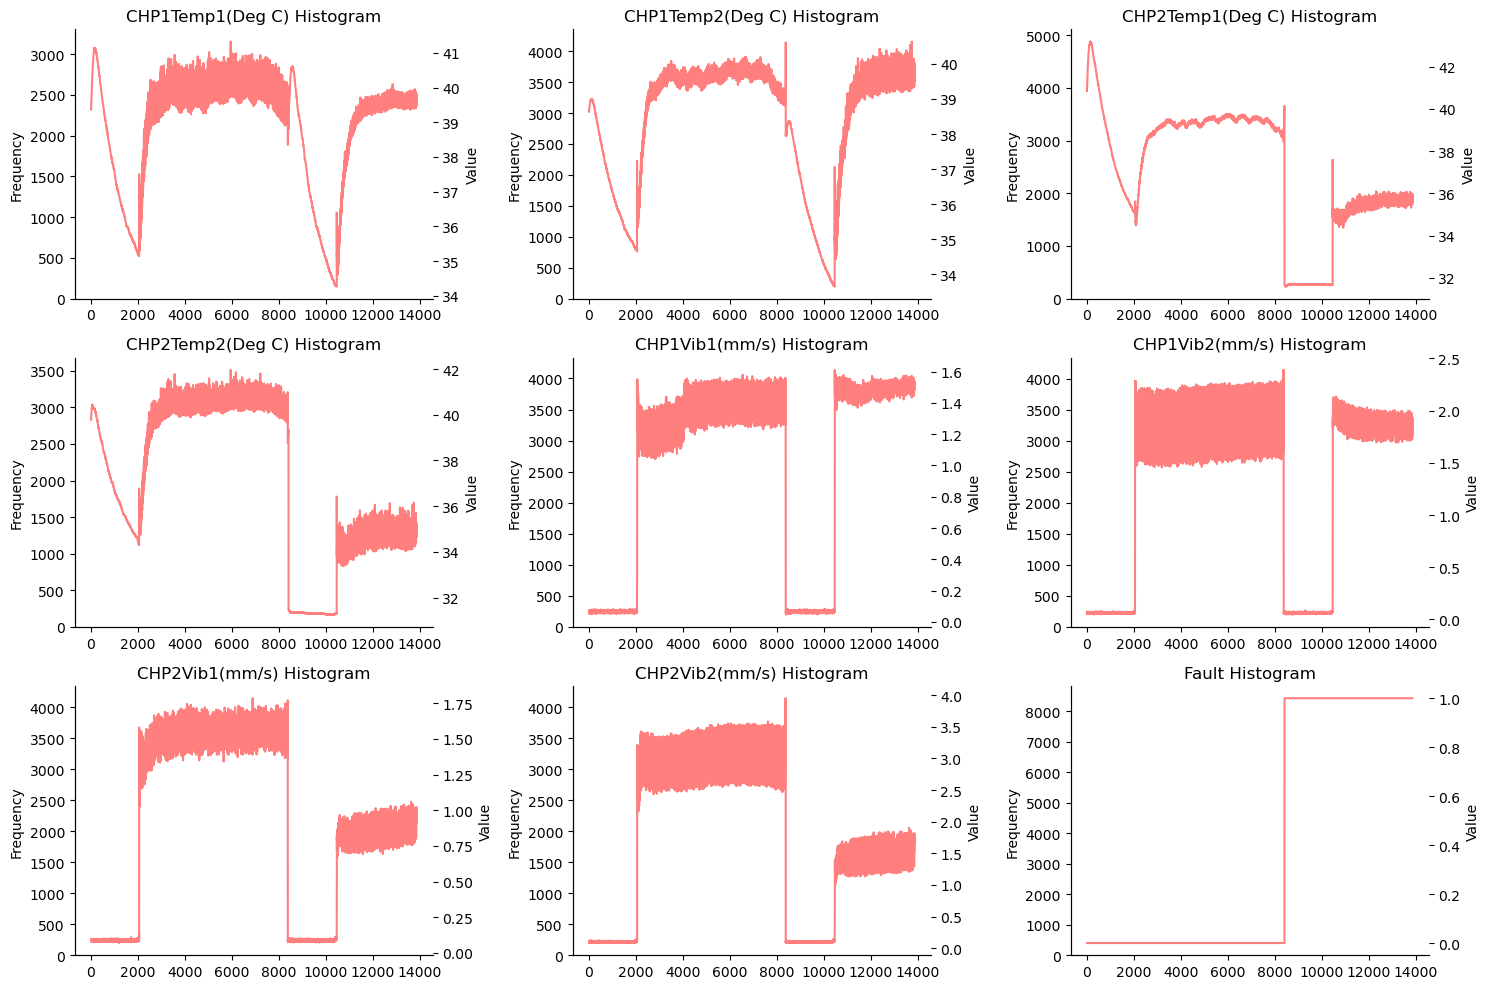

In [39]:
# Create a subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate over columns and plot histograms and line plots
for i, col in enumerate(columns):
    # Plot histogram
    df[col].plot(kind='hist', bins=20, ax=axs[i], alpha=0.5)
    axs[i].set_title(col + " Histogram")
    axs[i].spines[['top', 'right']].set_visible(False)

    # Plot line plot
    ax2 = axs[i].twinx()  # Create a second y-axis sharing the same x-axis
    df[col].plot(kind='line', color='red', ax=ax2, alpha=0.5)
    ax2.set_ylabel('Value')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

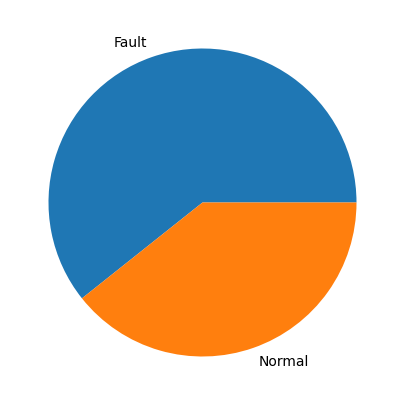

In [40]:
plt.figure(figsize=(5,5))
plt.pie(df['Fault'].value_counts()/len(df)*100,labels=['Fault','Normal'])
plt.show()

In [41]:
df['Fault'].value_counts()

0    8404
1    5443
Name: Fault, dtype: int64

In [42]:
df.shape

(13847, 9)

In [43]:
X=df.drop('Fault',axis=1)
Y=df['Fault']

In [44]:
poly=StandardScaler()
X=poly.fit_transform(X)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [46]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_predicted=knn_model.predict(x_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


OVERALL RESULT, USING Knn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2770
   macro avg       1.00      1.00      1.00      2770
weighted avg       1.00      1.00      1.00      2770

Accuracy:  0.9996389891696751


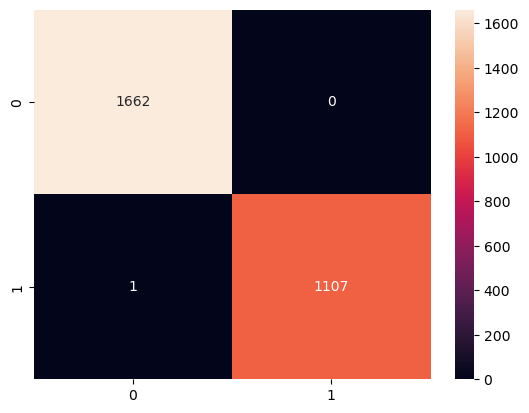

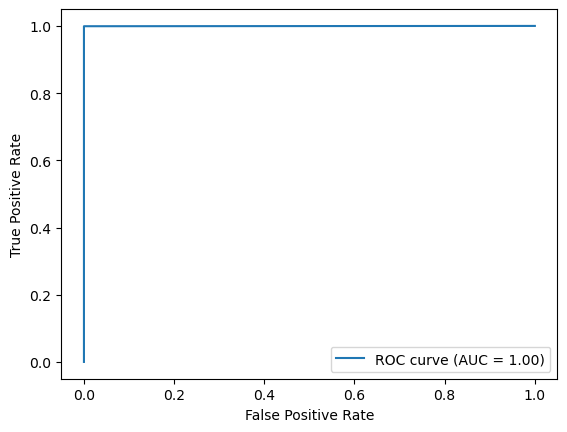

In [48]:
print('OVERALL RESULT, USING Knn')
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [49]:
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_predicted=LR_model.predict(x_test)

OVERALL RESULT, USING LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2770
   macro avg       1.00      1.00      1.00      2770
weighted avg       1.00      1.00      1.00      2770

Accuracy:  0.9996389891696751


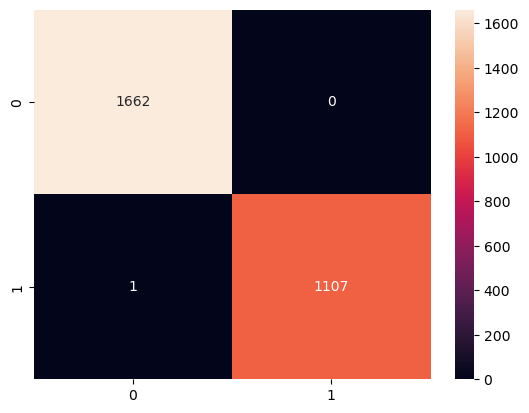

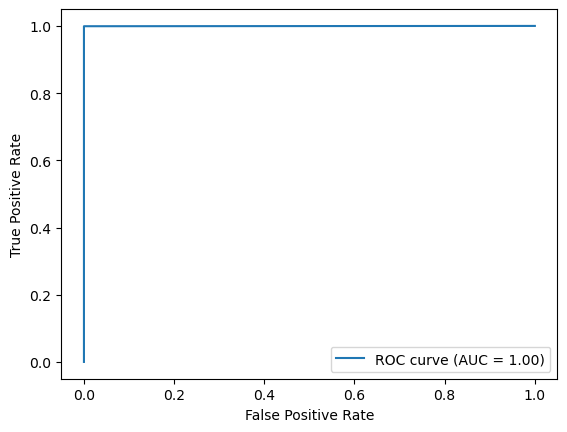

In [51]:
print('OVERALL RESULT, USING LogisticRegression')
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [52]:
DT_model=tree.DecisionTreeClassifier(max_depth=3,max_leaf_nodes=6)
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)

In [53]:
y_predicted_tree=DT_model.predict(x_test)

OVERALL RESULT, USING DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1662
           1       0.93      1.00      0.96      1108

    accuracy                           0.97      2770
   macro avg       0.96      0.97      0.97      2770
weighted avg       0.97      0.97      0.97      2770

Accuracy:  0.9693140794223827


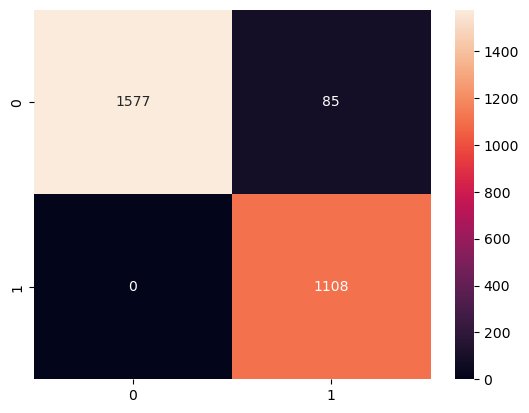

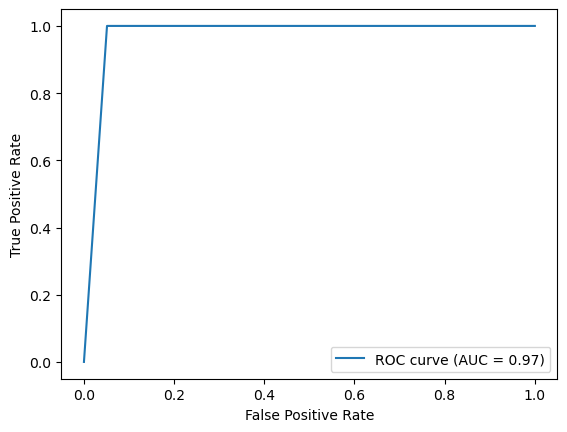

In [54]:
print('OVERALL RESULT, USING DecisionTreeClassifier')
print(classification_report(y_test,y_predicted_tree))
print("Accuracy: ",accuracy_score(y_test,y_predicted_tree))
plt.show()

sns.heatmap(confusion_matrix(y_test,y_predicted_tree),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted_tree)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [55]:
columns=(['CHP1Temp1(Deg C)', 'CHP1Temp2(Deg C)', 'CHP2Temp1(Deg C)',
       'CHP2Temp2(Deg C)', 'CHP1Vib1(mm/s)', 'CHP1Vib2(mm/s)',
       'CHP2Vib1(mm/s)', 'CHP2Vib2(mm/s)'])

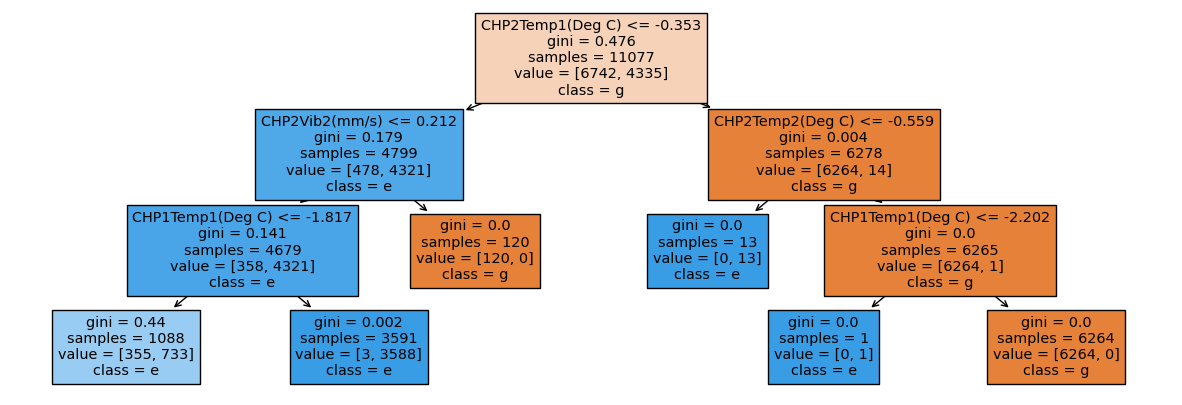

In [56]:
plt.figure(figsize=(15,5))
tree_plot=tree.plot_tree(DT_model,feature_names=columns,class_names='genre_top',filled=True)
plt.show()

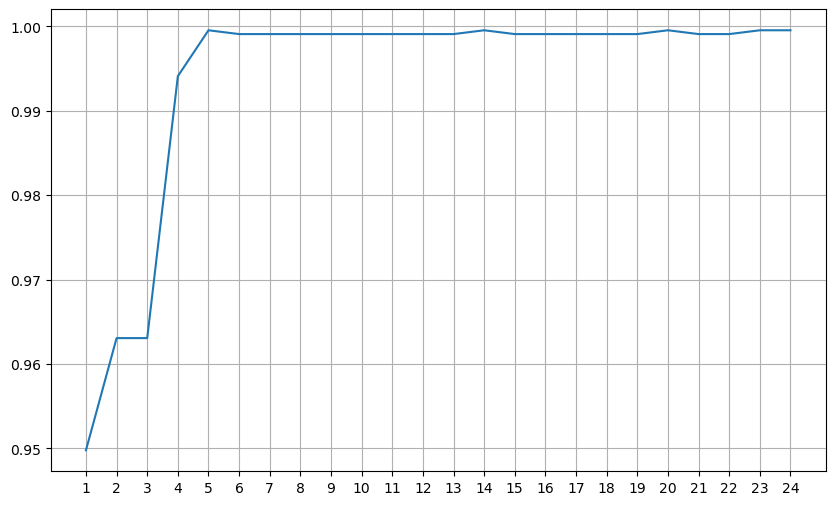

In [57]:
f1 = []
for k in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

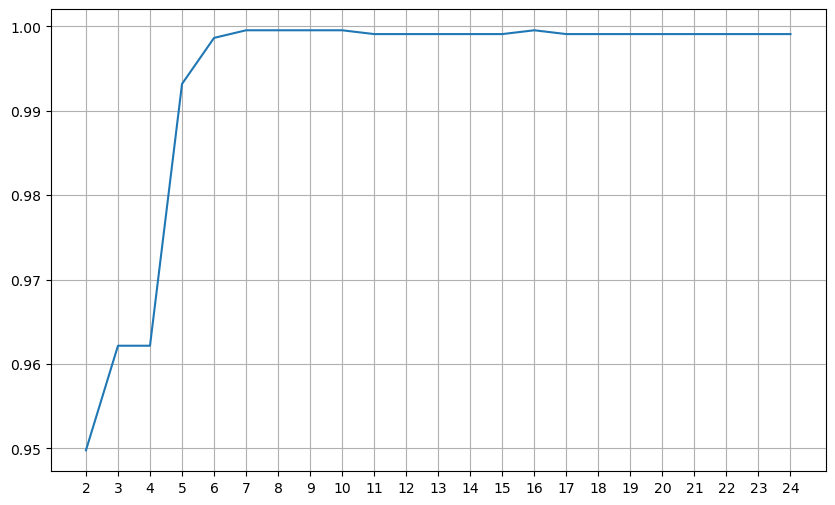

In [58]:
f1 = []
for k in range(2,25):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.grid()
plt.show()

In [59]:
import pickle
# Specify the file path where you want to save the model
model_filename = 'logistic_regression_model.pkl'

# Open the file in binary write mode and save the model using pickle.dump
with open(model_filename, 'wb') as file:
    pickle.dump(LR_model, file)

print(f"Model saved as {model_filename}")

Model saved as logistic_regression_model.pkl


As we can see that, Knn model is giving us 99.9%,

Logistic Regression gives 99.9%

DecisionTreeClassifier gives 96%

